<a id='part1'></a>
## Part 2 - Logistic Regression:

In [535]:
#I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work.

In [536]:
import numpy as np
from numpy import random 
import pandas as pd
import matplotlib.pyplot as plt

In [537]:
#Reading and prnting the Penguin DataSet :
dataframe = pd.read_csv('penguins.csv',low_memory=False)
print("Dataset: Penguins")
dataframe

Dataset: Penguins


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [538]:
#Main statistics of Dataset:
s_d=dataframe.describe(include='all')
print("Main Statistics of the Dataset:")
s_d

Main Statistics of the Dataset:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


In [539]:
#Info about each column in the data:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [540]:
#Converting features to Categorical:
dataframe["species"] = dataframe["species"].astype('category')
dataframe["island"] = dataframe["island"].astype('category')
dataframe["sex"] = dataframe["sex"].astype('category')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   bill_length_mm     342 non-null    float64 
 3   bill_depth_mm      342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                333 non-null    category
 7   year               344 non-null    int64   
dtypes: category(3), float64(4), int64(1)
memory usage: 14.9 KB


In [541]:
#Normalizing non-categorical features:
dataframe["bill_length_mm"] = (dataframe["bill_length_mm"] - dataframe["bill_length_mm"].min()) / (dataframe["bill_length_mm"].max() - dataframe["bill_length_mm"].min())
dataframe["bill_depth_mm"] = (dataframe["bill_depth_mm"] - dataframe["bill_depth_mm"].min()) / (dataframe["bill_depth_mm"].max() - dataframe["bill_depth_mm"].min())
dataframe["flipper_length_mm"] = (dataframe["bill_length_mm"] - dataframe["bill_length_mm"].min()) / (dataframe["bill_length_mm"].max() - dataframe["bill_length_mm"].min())
dataframe["body_mass_g"] = (dataframe["body_mass_g"] - dataframe["body_mass_g"].min()) / (dataframe["body_mass_g"].max() - dataframe["body_mass_g"].min())
dataframe

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,0.254545,0.666667,0.254545,0.291667,male,2007
1,Adelie,Torgersen,0.269091,0.511905,0.269091,0.305556,female,2007
2,Adelie,Torgersen,0.298182,0.583333,0.298182,0.152778,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,0.167273,0.738095,0.167273,0.208333,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,0.861818,0.797619,0.861818,0.361111,male,2009
340,Chinstrap,Dream,0.414545,0.595238,0.414545,0.194444,female,2009
341,Chinstrap,Dream,0.636364,0.607143,0.636364,0.298611,male,2009
342,Chinstrap,Dream,0.680000,0.702381,0.680000,0.388889,male,2009


In [542]:
#Number of NA values in each column:
print("Number of NA values in each column:")
dataframe.isnull().sum(axis=0)

Number of NA values in each column:


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [543]:
#Removing the rows with N/A values:
df1_main=dataframe.dropna()
df1_main

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,0.254545,0.666667,0.254545,0.291667,male,2007
1,Adelie,Torgersen,0.269091,0.511905,0.269091,0.305556,female,2007
2,Adelie,Torgersen,0.298182,0.583333,0.298182,0.152778,female,2007
4,Adelie,Torgersen,0.167273,0.738095,0.167273,0.208333,female,2007
5,Adelie,Torgersen,0.261818,0.892857,0.261818,0.263889,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,0.861818,0.797619,0.861818,0.361111,male,2009
340,Chinstrap,Dream,0.414545,0.595238,0.414545,0.194444,female,2009
341,Chinstrap,Dream,0.636364,0.607143,0.636364,0.298611,male,2009
342,Chinstrap,Dream,0.680000,0.702381,0.680000,0.388889,male,2009


In [544]:
#Choosing the target Y and Splitting dataset into Training and esting
dfx1 = df1_main.drop('sex', axis=1)
df1_main.sex.replace(('male','female'),(0,1), inplace= True)
y_ip = df1_main[df1_main.columns[6]].to_numpy()
dfx1.island.replace(('Torgersen','Biscoe','Dream'),(10,20,30), inplace= True)
dfx1.species.replace(('Adelie','Gentoo','Chinstrap'),(1,2,3), inplace= True)
x_ip=dfx1.to_numpy()
y_ip1= np.array(y_ip)
y_ip1=y_ip1.astype(float)
[x_train,x_test]=np.split(x_ip,[255],axis=0)
[y_train,y_test]=np.split(y_ip1,[255],axis=0)
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

/Users/svj/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [550]:
#Shapes of X, Y -> Train and Test data set
print("Shape of X_train:",np.shape(x_train))
print("Shape of Y_train:",np.shape(y_train))
print("Shape of X_test:",np.shape(x_test))
print("Shape of Y_test:",np.shape(y_test))

Shape of X_train: (255, 7)
Shape of Y_train: (255, 1)
Shape of X_test: (78, 7)
Shape of Y_test: (78, 1)


In [546]:
class LogitRegression:
    
    def __init__(self,learning_rate, iterations):
        self.l_r= learning_rate
        self.it=iterations
        self.weights = None
        self.bias = None
        
    def fit(self, x_train, y_train):
        count1=0
        self.iter=[]
        self.n_data, self.n_features= x_train.shape
        self.loss= []
        self.weights = np.zeros((1,self.n_features))
        self.bias=0
        for i in range(self.it):
            #print(self.weights.dtype)
            self.gradient_descent(x_train,y_train)
            cf = self.cost(x_train,y_train)
            count1+=1
            self.iter.append(count1)
            self.loss.append(cf)
            
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def cost(self,x,y):
        pred1 = np.dot(x,self.weights.T)
        pred= self.sigmoid(pred1)
        loss =np.sum((1/self.n_data)*((-y*np.log(pred))-(1-y)*np.log(1-pred)))
        return loss
    
    def gradient_descent(self,x,y):
        pred1 = np.dot(x,self.weights.T)
        pred= self.sigmoid(pred1)
        dw= (1/self.n_data)*np.dot(x.T,(pred-y))
        db= (1/self.n_data)*np.sum(pred-y)
        self.weights = self.weights - (self.l_r * dw).reshape(1, self.n_features)
        self.bias = self.bias - (self.l_r * db)
       
    def predict(self,x):
        pred1 = np.dot(x,self.weights.T)
        pred= self.sigmoid(pred1)
        self.y_pred = [1 if i >= 0.488 else 0 for i in pred]
        return self.y_pred
    
    def accuracy(self, Y, pred):
        crct_pred = 0
        for i,data in enumerate(Y):
            if Y[i][0] == pred[i]:
                crct_pred += 1
        wrng_pred = self.n_data - crct_pred
        print("Correct Prediction:", crct_pred)
        accuracy_value = (crct_pred/len(Y)) * 100
        return accuracy_value

In [547]:
#Training the Model:
learning_rate= 0.000001
iterations = 100000
model = LogitRegression(learning_rate, iterations)
model.fit(x_train, y_train)
#Testing the Model:
predictions=model.predict(x_test)
#Accuracy:
print("Accuracy: ", model.accuracy( y_test, predictions))

Correct Prediction: 65
Accuracy:  83.33333333333334


In [548]:
#Loss values for each Iteration:
print("Losses with respect to Iteration:")
for i in model.iter:
    print(i,' -> ',model.loss[i-1])    

Losses with respect to Iteration:
1  ->  0.6930779682308104
2  ->  0.6930779557878999
3  ->  0.6930779478816778
4  ->  0.6930779399757739
5  ->  0.693077932069898
6  ->  0.6930779241640497
7  ->  0.6930779162582291
8  ->  0.6930779083524363
9  ->  0.6930779004466714
10  ->  0.6930778925409341
11  ->  0.6930778846352246
12  ->  0.6930778767295429
13  ->  0.6930778688238889
14  ->  0.6930778609182626
15  ->  0.6930778530126641
16  ->  0.6930778451070934
17  ->  0.6930778372015504
18  ->  0.6930778292960351
19  ->  0.6930778213905475
20  ->  0.6930778134850879
21  ->  0.6930778055796558
22  ->  0.6930777976742515
23  ->  0.6930777897688749
24  ->  0.6930777818635262
25  ->  0.6930777739582052
26  ->  0.6930777660529118
27  ->  0.6930777581476464
28  ->  0.6930777502424086
29  ->  0.6930777423371985
30  ->  0.6930777344320161
31  ->  0.6930777265268615
32  ->  0.6930777186217347
33  ->  0.6930777107166355
34  ->  0.6930777028115643
35  ->  0.6930776949065206
36  ->  0.6930776870015047
37  

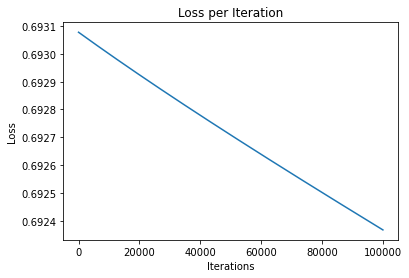

In [556]:
#Plotting Loss graph 
figure, plot = plt.subplots()
plot.plot(model.iter,model.loss,)
plot.set_ylabel('Loss')
plot.set_xlabel('Iterations')
plot.set_title('Loss per Iteration');